In [1]:
import sys; sys.path.append('..')
import random, math, os
import pyzx as zx
from fractions import Fraction
import numpy as np
np.set_printoptions(linewidth=500)
%config InlineBackend.figure_format = 'svg'

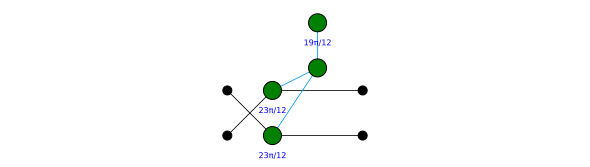

In [2]:
c = zx.Circuit(2)
c.gates = [zx.gates.FSim(Fraction(1,2), Fraction(1,6), 0, 1)]
g = c.to_graph(zh=True)
zx.draw(g)

In [3]:
g.to_matrix()

array([[ 1.       +0.j ,  0.       +0.j ,  0.       +0.j ,  0.       +0.j ],
       [ 0.       +0.j ,  0.       +0.j , -0.       -1.j ,  0.       +0.j ],
       [ 0.       +0.j , -0.       -1.j ,  0.       +0.j ,  0.       +0.j ],
       [ 0.       +0.j ,  0.       +0.j ,  0.       +0.j ,  0.8660254-0.5j]])

In [11]:
np.exp((-1.0j/6.0) * math.pi)

(0.8660254037844387-0.49999999999999994j)

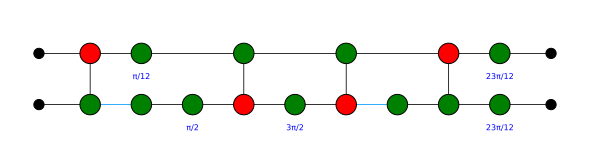

In [46]:
g0 = zx.qasm("""
qreg q[1];
qreg r[1];
cx r[0], q[0];
h r[0];
rz(0.0833333333333*pi) q[0];
rz(0.5*pi) r[0];
cx q[0], r[0];
rz(-0.5*pi) r[0];
cx q[0], r[0];
h r[0];
cx r[0], q[0];
rz(-0.0833333333333*pi) q[0];
rz(-0.0833333333333*pi) r[0];
""").to_graph()

zx.draw(g0)

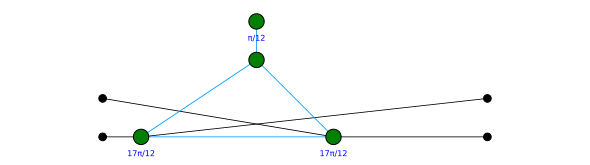

In [47]:
zx.full_reduce(g0)
zx.draw(g0)

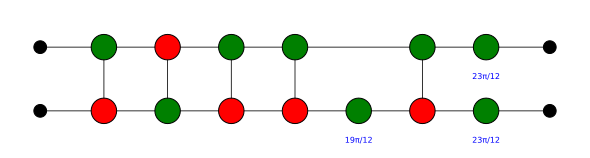

In [56]:
c = zx.Circuit(2)
c.gates = [
    zx.gates.SWAP(0,1),
    zx.gates.ParityPhase(Fraction(19,12), 0, 1),
    zx.gates.ZPhase(0, Fraction(-1,12)),
    zx.gates.ZPhase(1, Fraction(-1,12))
]
g1 = c.to_graph()
zx.draw(g1)

In [49]:
g0.to_matrix()

array([[1.       +0.j , 0.       +0.j , 0.       +0.j , 0.       +0.j ],
       [0.       +0.j , 0.       +0.j , 0.       -1.j , 0.       +0.j ],
       [0.       +0.j , 0.       -1.j , 0.       +0.j , 0.       +0.j ],
       [0.       +0.j , 0.       +0.j , 0.       +0.j , 0.8660254-0.5j]])

In [52]:
g1.to_matrix()

array([[ 1.       +0.j ,  0.       +0.j ,  0.       +0.j ,  0.       +0.j ],
       [ 0.       +0.j ,  0.       +0.j , -0.       -1.j ,  0.       +0.j ],
       [ 0.       +0.j , -0.       -1.j ,  0.       +0.j ,  0.       +0.j ],
       [ 0.       +0.j ,  0.       +0.j ,  0.       +0.j ,  0.8660254-0.5j]])

In [53]:
zx.compare_tensors(g0,g1)

True

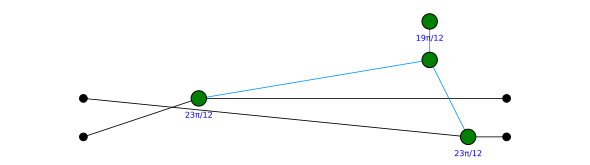

In [54]:
zx.full_reduce(g1)
zx.draw(g1)

In [ ]:
g = c.to_graph(zh=True)
zx.d3.draw(g)

In [ ]:
g.apply_state(g.qubit_count() * "+")
g.apply_effect(g.qubit_count() * "+")

In [ ]:
zx.d3.draw(g)

In [ ]:
g1 = g.copy()

In [ ]:
zx.hsimplify.hpivot_simp(g1)

In [ ]:
g1.normalise()
zx.d3.draw(g1)

In [ ]:
f = open('sim.graphml', 'w')
f.write(zx.to_graphml(g1))
f.close()

In [ ]:
hd = [v for v in g.vertices() if g.vertex_degree(v) > 2]
(sum(g.vertex_degree(v) for v in hd)/float(len(hd)), len(hd))

In [ ]:
hd = [v for v in g1.vertices() if g1.vertex_degree(v) > 2]
(sum(g1.vertex_degree(v) for v in hd)/float(len(hd)), len(hd))